# Uniform random variate generation

This chapter is about exact generation of random variates. We mainly classify this into two methods: (i) Direct sampling, (ii) Rejection sampling. These methods are both exact and simple to implement.

As seen in the course, we can use linear congruential generator for this purpose. Linear congruential generators (LCGs from now on) are based on simulating a recursion:
\begin{align*}
x_{n+1} \equiv a x_n + b \quad \quad \quad (\text{mod } m)
\end{align*}
where $x_0$ is the *seed*, $m$ is the *modulus*, $b$ is the *shift*, and $a$ is the *multiplier*. We have
* $m$ is an integer
* $x_0, a, b \in \{0, \ldots, m-1\}$.

Given $x_n \in \{0,\ldots,m-1\}$, we generate the uniform random numbers
\begin{align*}
u_n = \frac{x_n}{m} \in [0, 1) \quad \quad \forall n.
\end{align*}

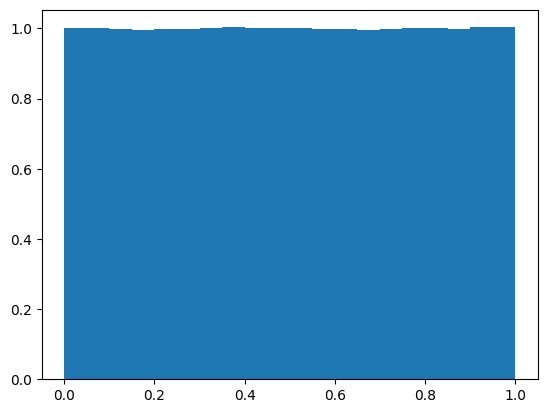

In [16]:
import matplotlib.pyplot as plt
import numpy as np

def lcg(a, b, m, n, x0):
    x = np.zeros(n)
    u = np.zeros(n)
    x[0] = x0
    u[0] = x0 / m
    for k in range(1, n):
        x[k] = (a * x[k - 1] + b) % m
        u[k] = x[k] / m
    return u

n = 100000
a = 106
b = 1283
m = 6075
x0 = 1
u = lcg(a, b, m, n, x0);
plt.hist(u, bins=20, density=True);

Not bad! But how do we choose $a, b, m$? We need to choose them in such a way that the sequence $u_n$ is *random enough*. Note that this can be tricky.

Let us do another experiment.

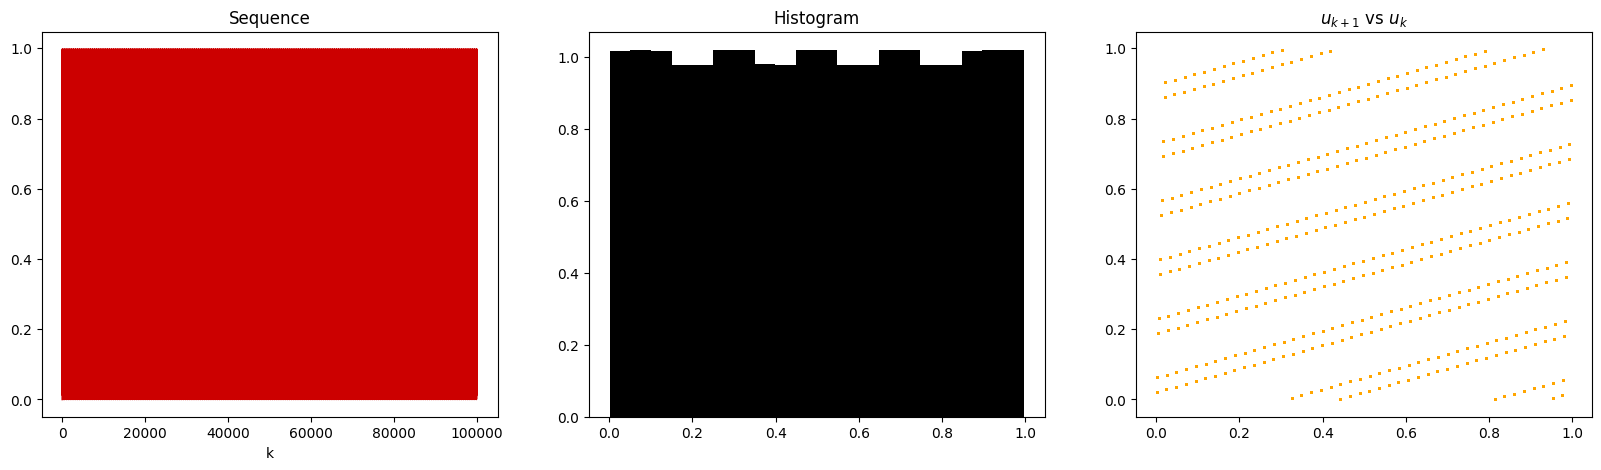

In [17]:
m = 2048
a = 43
b = 0
x0 = 1

u = lcg(a, b, m, n, x0)

fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].plot(u, color=[0.8, 0, 0])
axs[0].set_title("Sequence")
axs[0].set_xlabel("k")
axs[1].hist(u, bins=20, density=True, color='k', alpha=1)
axs[1].set_title("Histogram")
axs[2].scatter(u[:-1], u[1:], c='orange', s=0.1)
axs[2].set_title("$u_{k+1}$ vs $u_k$")
plt.show()

We can see that the choice matters! Although the histogram looks almost uniform, the samples are _very_ structured. This is very crucial in applications to avoid. In most of the applications, uniform pseudo-random numbers are the building block of subsequent sampling algorithms. Let us see how a bad uniform random number generator can ruin our sampling algorithm.

Let us consider sampling a Gaussian random variate (we will see this algorithm in the future). Recall the 2D plot of a Gaussian:

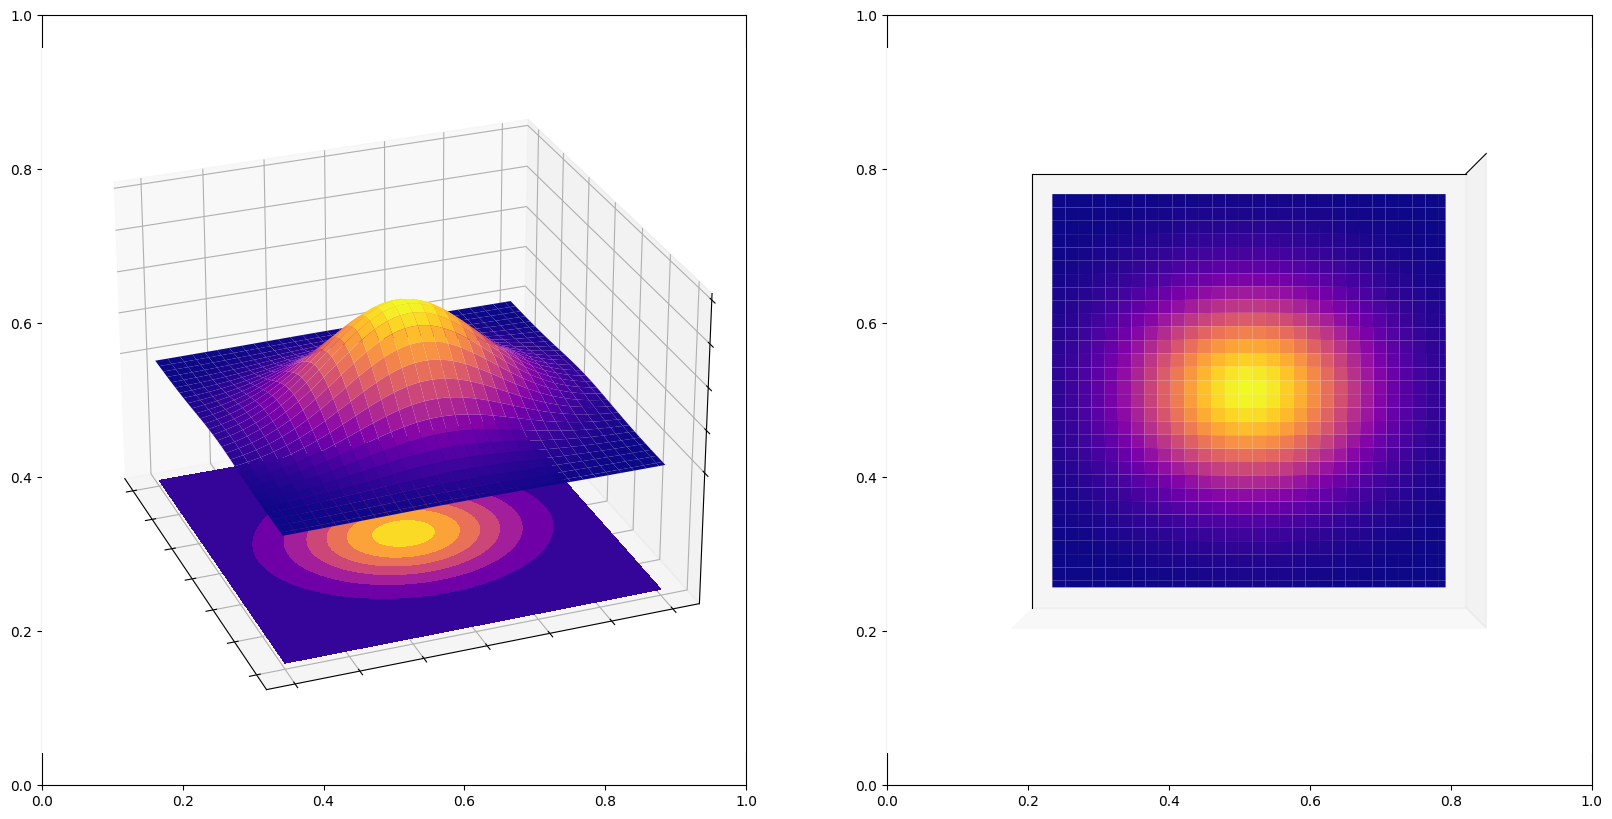

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

# Our 2-dimensional distribution will be over variables X and Y
N = 60
X = np.linspace(-3, 3, N)
Y = np.linspace(-3, 3, N)
X, Y = np.meshgrid(X, Y)

# Mean vector and covariance matrix
mu = np.array([0., 0.])
Sigma = np.array([[ 1. , 0], [0,  1.5]])

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

F = multivariate_normal(mu, Sigma)
Z = F.pdf(pos)

# Create a surface plot and projected filled contour plot under it.
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# create first subplot
axs[0] = fig.add_subplot(1,2,1,projection='3d')
axs[0].plot_surface(X, Y, Z, antialiased=True, cmap=cm.plasma)
cset = axs[0].contourf(X, Y, Z, zdir='z', offset=-0.15, cmap=cm.plasma)
# Adjust the limits, ticks and view angle
axs[0].set_zlim(-0.15,0.2)
axs[0].set_zticks(np.linspace(0,0.2,5))
axs[0].view_init(27, -21)
# clear axis labels
axs[0].set_xticklabels([])
axs[0].set_yticklabels([])
axs[0].set_zticklabels([])

# create second subplot
axs[1] = fig.add_subplot(1,2,2,projection='3d')
axs[1].plot_surface(X, Y, Z, antialiased=True, cmap=cm.plasma)
axs[1].set_zlim(-0.15,0.2)
axs[1].set_zticks(np.linspace(0,0.2,5))
axs[1].view_init(90, 0)
# clear axis labels
axs[1].set_xticklabels([])
axs[1].set_yticklabels([])
axs[1].set_zticklabels([])
# clear axis ticks and grid
axs[1].set_xticks([])
axs[1].set_yticks([])
axs[1].set_zticks([])
# #clear axis spines
# axs[1].w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
# axs[1].w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
# axs[1].w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

# # clear the space between axes
# plt.subplots_adjust(wspace=0, hspace=0)
# plt.tight_layout()

plt.show()

As you can see, any correct 2D sample (data points) coming from this Gaussian should be distributed like this, in particular, if we plotted their histograms, we should get an image above that is on the right hand side. Now, let us try to simulate Gaussians using the bad quality LCG we saw above (again below we use Box-Muller method which will be introduced later).

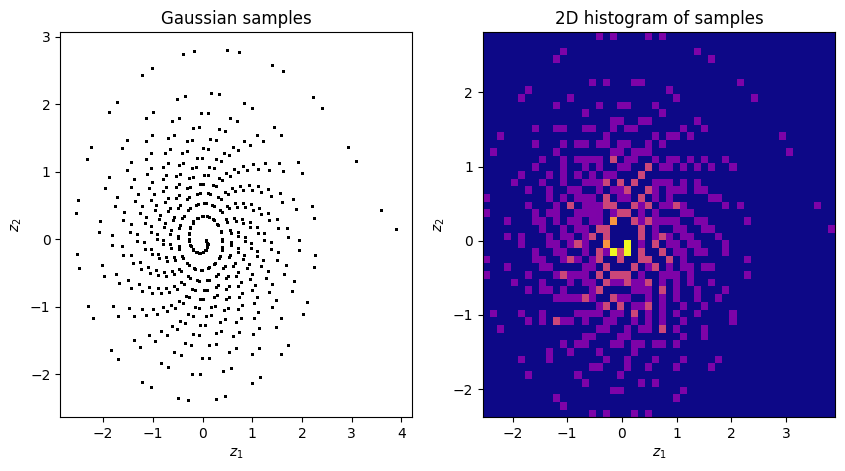

In [23]:
def box_muller(u1, u2):
    z1 = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
    z2 = np.sqrt(-2 * np.log(u1)) * np.sin(2 * np.pi * u2)
    return z1, z2

n = 100000
m = 2048
a = 43
b = 0
x0 = 1

u1 = lcg(a, b, m, n, x0)
u2 = lcg(a, b, m, n, x0 + 12)
z1, z2 = box_muller(u1, u2)
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].scatter(z1, z2, s=0.1, c='k')
axs[0].set_title("Gaussian samples")
axs[0].set_xlabel("$z_1$")
axs[0].set_ylabel("$z_2$")
axs[1].hist2d(z1, z2, bins=50, cmap='plasma')
axs[1].set_title("2D histogram of samples")
axs[1].set_xlabel("$z_1$")
axs[1].set_ylabel("$z_2$")

plt.show()

What happened? Our Gaussian samples look horrible, it reflects the LCG quality. Therefore, it is in general a bad idea to use custom LCG generators. We turn below to a good quality one.

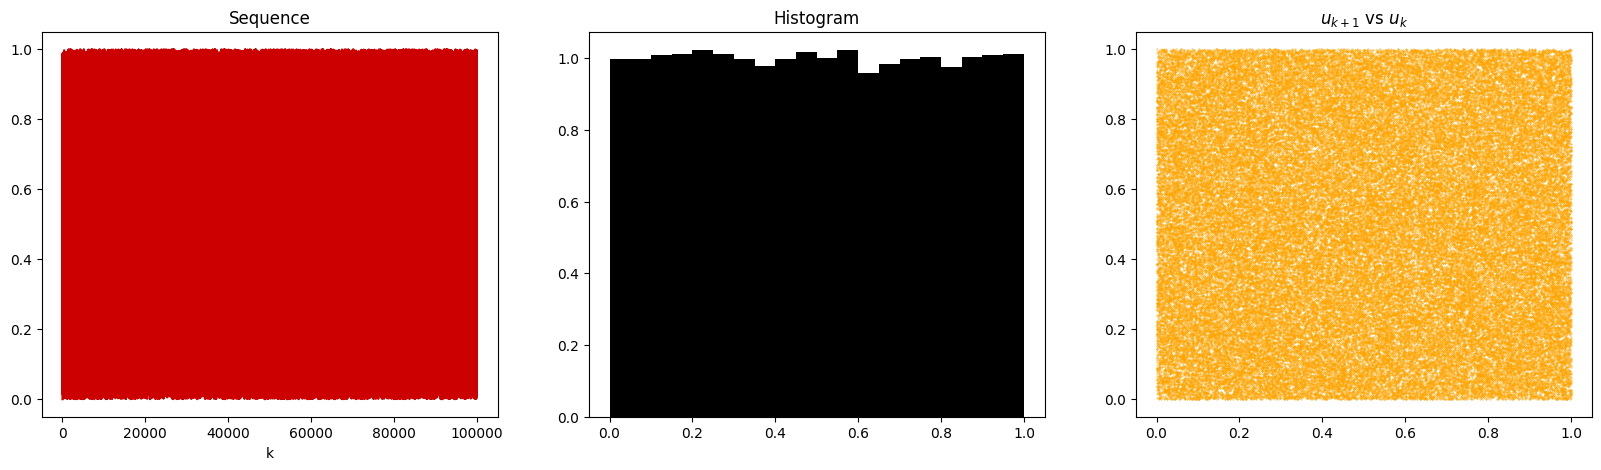

In [25]:
m = 2**32
a = 1664525
x0 = 15
b = 1013904223

u = lcg(a, b, m, n, x0)

fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].plot(u, color=[0.8, 0, 0])
axs[0].set_title("Sequence")
axs[0].set_xlabel("k")
axs[1].hist(u, bins=20, density=True, color='k', alpha=1)
axs[1].set_title("Histogram")
axs[2].scatter(u[:-1], u[1:], c='orange', s=0.1)
axs[2].set_title("$u_{k+1}$ vs $u_k$")
plt.show()

Using this, let us look at the resulting Gaussian sample.

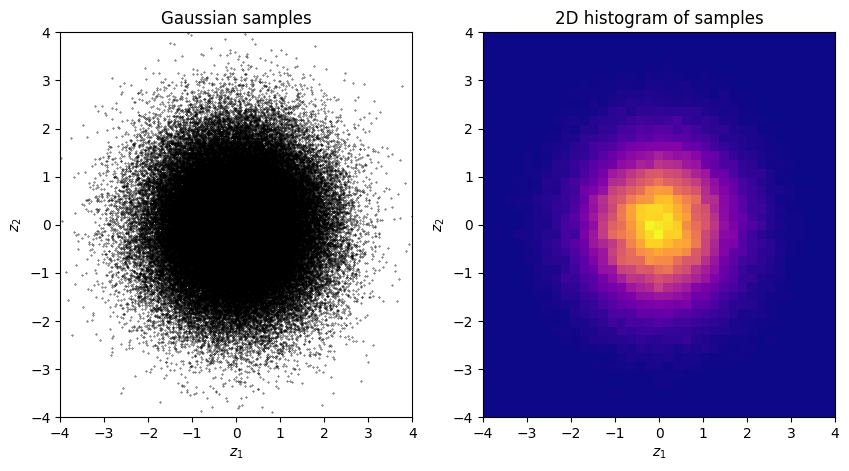

In [27]:
u1 = lcg(a, b, m, n, x0)
u2 = lcg(a, b, m, n, x0 + 12)
z1, z2 = box_muller(u1, u2)
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].scatter(z1, z2, s=0.1, c='k')
axs[0].set_title("Gaussian samples")
axs[0].set_xlabel("$z_1$")
axs[0].set_ylabel("$z_2$")
axs[0].set_xlim(-4, 4)
axs[0].set_ylim(-4, 4)
axs[1].hist2d(z1, z2, bins=50, cmap='plasma')
axs[1].set_title("2D histogram of samples")
axs[1].set_xlabel("$z_1$")
axs[1].set_ylabel("$z_2$")
axs[1].set_xlim(-4, 4)
axs[1].set_ylim(-4, 4)

plt.show()

Much better! To avoid any issues of this sort, we will always advise using `numpy`'s built-in uniform random number generator, namely, `numpy.random.uniform`. This is a good quality uniform random number generator.

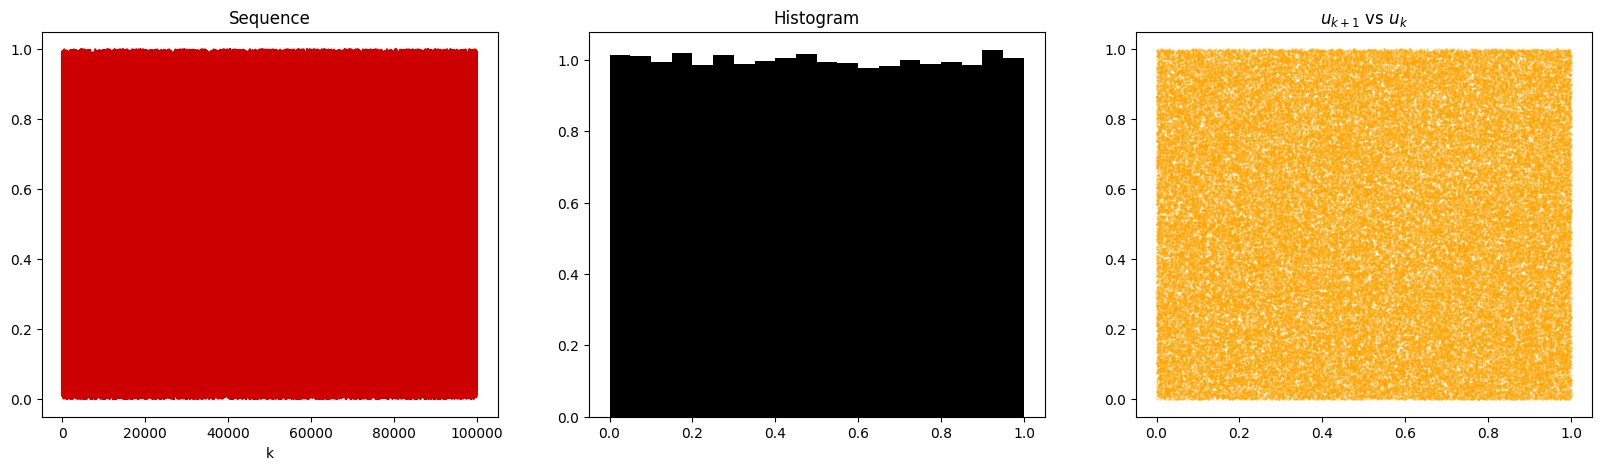

In [28]:
u = np.random.uniform(0, 1, n)

fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].plot(u, color=[0.8, 0, 0])
axs[0].set_title("Sequence")
axs[0].set_xlabel("k")
axs[1].hist(u, bins=20, density=True, color='k', alpha=1)
axs[1].set_title("Histogram")
axs[2].scatter(u[:-1], u[1:], c='orange', s=0.1)
axs[2].set_title("$u_{k+1}$ vs $u_k$")
plt.show()

Needless to say, this will give us a perfect Gaussian sample too.

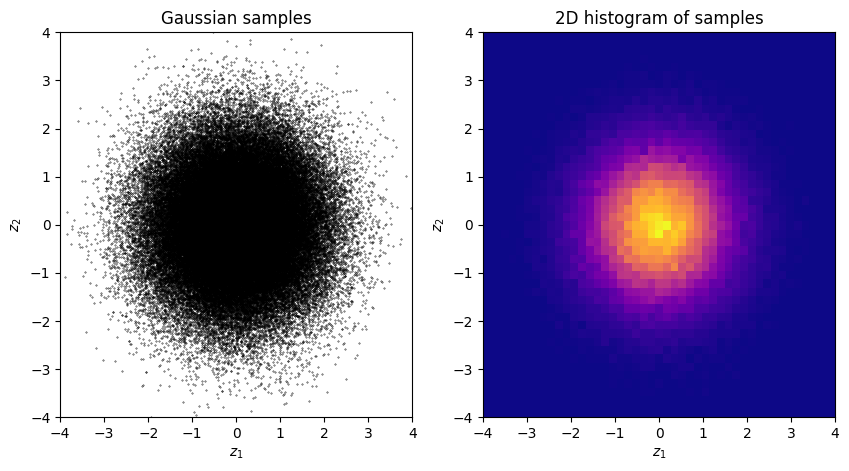

In [29]:
u1 = np.random.uniform(0, 1, n)
u2 = np.random.uniform(0, 1, n)
z1, z2 = box_muller(u1, u2)
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].scatter(z1, z2, s=0.1, c='k')
axs[0].set_title("Gaussian samples")
axs[0].set_xlabel("$z_1$")
axs[0].set_ylabel("$z_2$")
axs[0].set_xlim(-4, 4)
axs[0].set_ylim(-4, 4)
axs[1].hist2d(z1, z2, bins=50, cmap='plasma')
axs[1].set_title("2D histogram of samples")
axs[1].set_xlabel("$z_1$")
axs[1].set_ylabel("$z_2$")
axs[1].set_xlim(-4, 4)
axs[1].set_ylim(-4, 4)

plt.show()